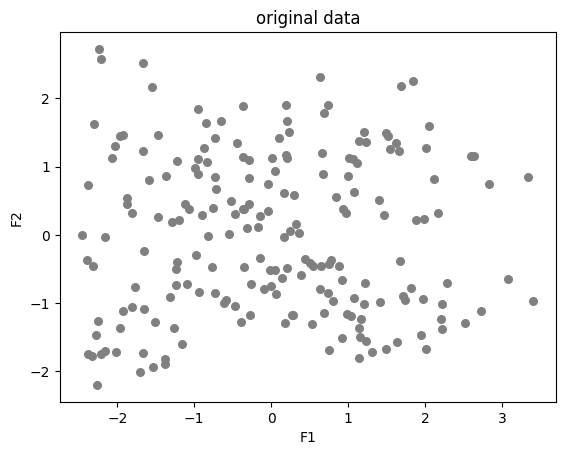

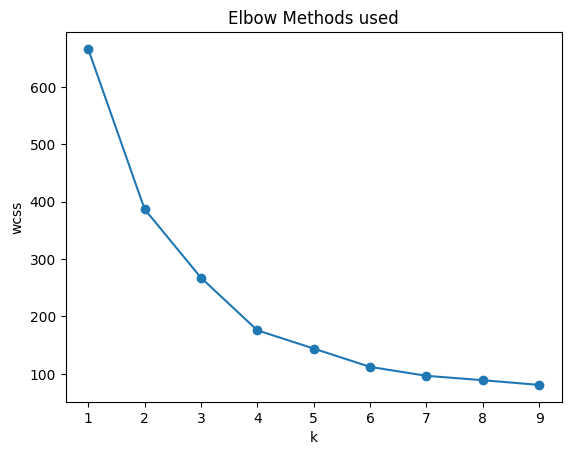

0.4077416326606182


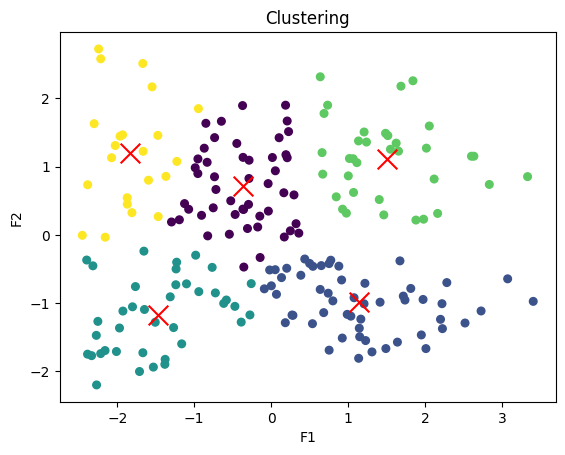

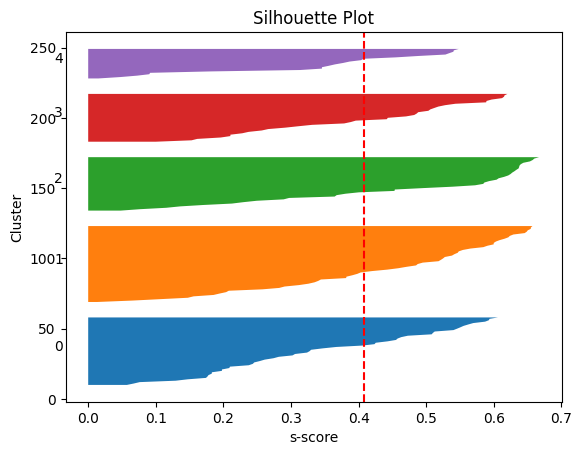

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

df = pd.read_csv('Mall_Customers.csv')

# 범주형 데이터인 Gender 레이블 인코딩
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# 차원 축소를 위한 표준화
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# 2개로 줄이기 위한 차원축소 진행
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# 데이터 그래프 생성 : 군집화 하기 전, 중앙값 구하기 전
plt.scatter(df_pca[:, 0], df_pca[:, 1], s=30, c='gray', label='original data')
plt.title('original data')
plt.xlabel('F1')
plt.ylabel('F2')
plt.show()

# k의 최적값을 찾기 위한 엘보우 메서드
wcss = []
k_range = range(1, 10)
for k in k_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit_predict(df_pca)
    wcss.append(kmeans_temp.inertia_)

plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Methods used')
plt.xlabel('k')
plt.ylabel('wcss')
plt.show()

k = 5
# Kmeans 객체생성 학습
kmeans = KMeans(n_clusters=k, random_state=42)
# 레이블 값 반환
cluster_labels = kmeans.fit_predict(df_pca)

# 실루엣 스코어
sil_avg = silhouette_score(df_pca, cluster_labels)
print(sil_avg)

# 시각화를 위한 점수계산
sil_values = silhouette_samples(df_pca, cluster_labels)

# 군집 결과 시각화
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels, cmap='viridis', s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='x')
plt.title('Clustering')
plt.xlabel('F1')
plt.ylabel('F2')
plt.show()

# 실루엣 점수 시각화
y_lower = 10
for i in range(k) :
    ith_cluster_sil_val = sil_values[cluster_labels == i]
    ith_cluster_sil_val.sort()
    size_cluster_i = ith_cluster_sil_val.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_val)
    plt.text(-0.05, y_lower + 0.5*size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.axvline(x=sil_avg, color='red', linestyle='--')
plt.title('Silhouette Plot')
plt.xlabel('s-score')
plt.ylabel('Cluster')
plt.show()

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

df = pd.read_csv('Mall_Customers.csv')

In [30]:
 # Step 1: 레이블 인코딩
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [31]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [35]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

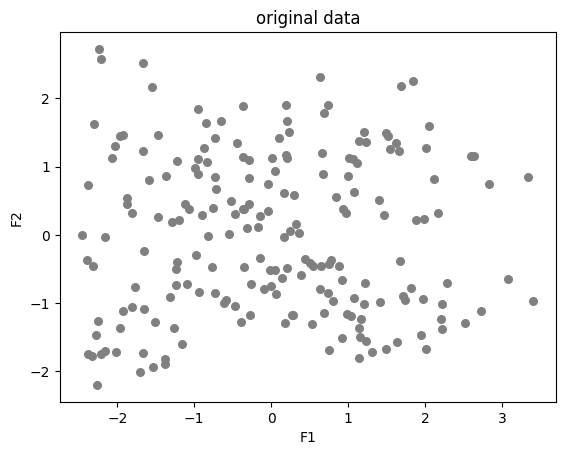

In [38]:
# 데이터 그래프 생성 : 군집화 하기 전, 중앙값 구하기 전
plt.scatter(df_pca[:, 0], df_pca[:, 1], s=30, c='gray', label='original data')
plt.title('original data')
plt.xlabel('F1')
plt.ylabel('F2')
plt.show()

In [54]:
# Kmeans 객체생성 학습
kmeans = KMeans(n_clusters=2, random_state=42)
# 레이블 값 반환
cluster_labels = kmeans.fit_predict(df_pca)

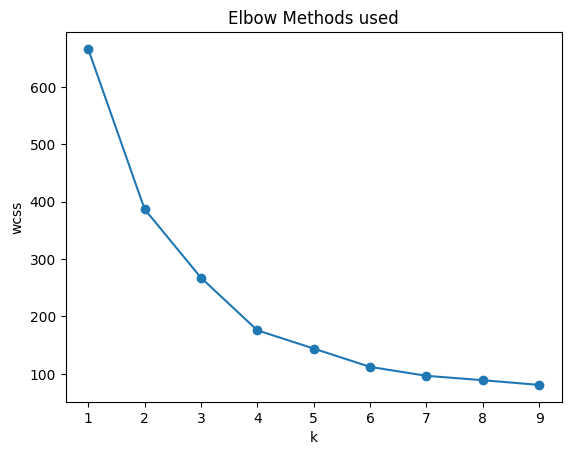

In [47]:
wcss = []
k_range = range(1, 10)
for k in k_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit_predict(df_pca)
    wcss.append(kmeans_temp.inertia_)

plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Methods used')
plt.xlabel('k')
plt.ylabel('wcss')
plt.show()

In [55]:
# 실루엣 스코어
sil_avg = silhouette_score(df_pca, cluster_labels)
print(sil_avg)

0.3656632053581109


In [ ]:
# 시각화를 위한 점수계산
sil_values = silhouette_samples(df_pca, cluster_labels)
print(sil_values)

Text(0, 0.5, 'F2')

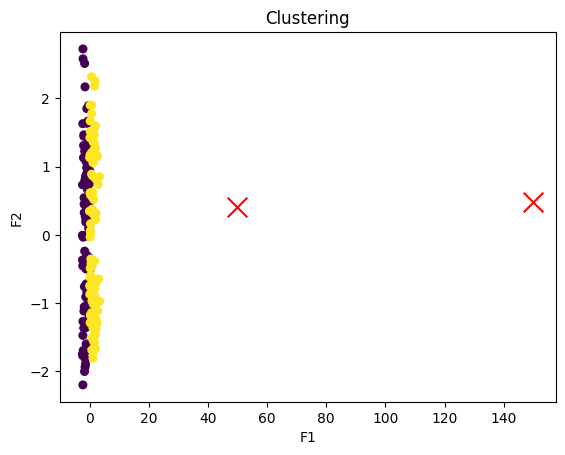

In [72]:
# 군집 결과 시각화
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels, cmap='viridis', s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='x')
plt.title('Clustering')
plt.xlabel('F1')
plt.ylabel('F2')

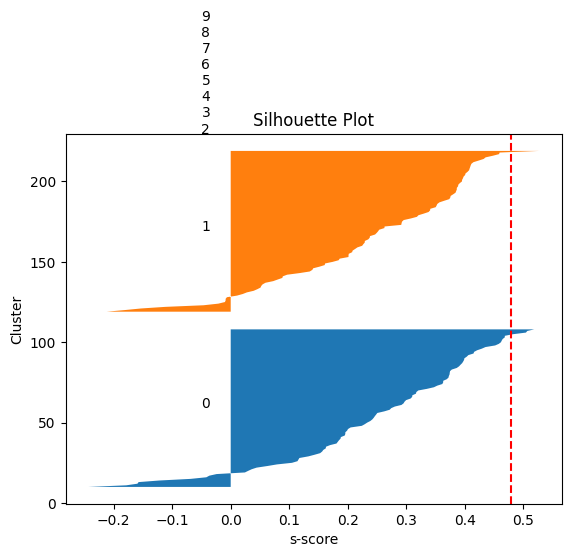

In [73]:
import numpy as np
y_lower = 10
for i in range(10) :
    ith_cluster_sil_val = sil_values[cluster_labels == i]
    ith_cluster_sil_val.sort()
    size_cluster_i = ith_cluster_sil_val.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_val)
    plt.text(-0.05, y_lower + 0.5*size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.axvline(x=sil_avg, color='red', linestyle='--')
plt.title('Silhouette Plot')
plt.xlabel('s-score')
plt.ylabel('Cluster')
plt.show()

In [82]:
# 퀄리티 빼고 진행

# 필요한 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 데이터 로드
# Kaggle에서 제공하는 "Mall_Customers.csv" 파일을 다운로드하고 같은 디렉토리에 저장하세요.
data = pd.read_csv('Mall_Customers.csv')

# 데이터 정규화
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# K-Means 클러스터링 모델 생성
# k를 5로 설정하고 이후 적절한 k값 도출
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(scaled_features)

data['Cluster'] = kmeans.labels_

# 5. 각 클러스터의 기초 통계값 확인
cluster_stats = data.groupby('Cluster').describe()
print(cluster_stats)
cluster_labels = kmeans.fit_predict(scaled_features)
# 실루엣 스코어
sil_avg = silhouette_score(scaled_features, cluster_labels)
print(sil_avg)

        CustomerID                                                            \
             count        mean        std    min    25%    50%    75%    max   
Cluster                                                                        
0             77.0   88.168831  23.409064   44.0   69.0   88.0  107.0  143.0   
1             39.0  162.000000  22.803509  124.0  143.0  162.0  181.0  200.0   
2             22.0   23.090909  13.147185    2.0   12.5   23.0   33.5   46.0   
3             35.0  164.371429  21.457325  125.0  148.0  165.0  182.0  199.0   
4             12.0   20.166667  11.953192    3.0   10.5   19.0   31.5   37.0   
5             15.0   32.666667  17.107503    1.0   20.0   39.0   46.5   56.0   

          Age             ... Annual Income (k$)         \
        count       mean  ...                75%    max   
Cluster                   ...                             
0        77.0  43.194805  ...              63.00   76.0   
1        39.0  32.692308  ...              